In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: 

In [ ]:
path='/content/drive/MyDrive/cs challenge/cs challenge/NSL-KDD-Dataset-master/KDDTest+.txt'

In [ ]:
# Load the data from the text file
data = pd.read_csv(path, header=None)

In [ ]:
# Check the first few rows of the data
print(data.head())

   0    1        2   3    4     5   6   7   8   9   ...    33    34    35  \
0  13  tcp   telnet  SF  118  2425   0   0   0   0  ...  0.38  0.12  0.04   
1   0  udp  private  SF   44     0   0   0   0   0  ...  1.00  0.01  0.01   
2   0  tcp   telnet  S3    0    44   0   0   0   0  ...  0.31  0.61  0.00   
3   0  udp  private  SF   53    55   0   0   0   0  ...  1.00  0.00  0.87   
4   0  tcp  private  SH    0     0   0   0   0   0  ...  0.06  1.00  1.00   

    36    37    38    39   40            41  42  
0  0.0  0.00  0.00  0.12  0.3  guess_passwd   2  
1  0.0  0.00  0.00  0.00  0.0     snmpguess  12  
2  0.0  0.21  0.68  0.60  0.0  processtable  18  
3  0.0  0.00  0.00  0.00  0.0        normal  17  
4  0.0  1.00  1.00  0.00  0.0          nmap  17  

[5 rows x 43 columns]


In [ ]:
# Rename columns for easier reference
column_names = [
    "duration", "protocol_type", "service", "flag", "src_bytes", "dst_bytes",
    "land", "wrong_fragment", "urgent", "hot", "num_failed_logins",
    "logged_in", "num_compromised", "root_shell", "su_attempted", "num_root",
    "num_file_creations", "num_shells", "num_access_files", "num_outbound_cmds",
    "is_host_login", "is_guest_login", "count", "srv_count", "serror_rate",
    "srv_serror_rate", "rerror_rate", "srv_rerror_rate", "same_srv_rate",
    "diff_srv_rate", "srv_diff_host_rate", "dst_host_count", "dst_host_srv_count",
    "dst_host_same_srv_rate", "dst_host_diff_srv_rate", "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate", "dst_host_serror_rate", "dst_host_srv_serror_rate",
    "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "attack_type", "last_column"
]
data.columns = column_names

In [ ]:
# Separate features and label
#X = data.drop(columns=["label", "difficulty"])
#y = data["label"]
# Encode categorical variables
categorical_features = ["protocol_type", "service", "flag"]
for feature in categorical_features:
    data[feature] = LabelEncoder().fit_transform(data[feature])


In [ ]:
# Split into features (X) and target (y)
X = data.drop(columns=["attack_type"])  # Drop the attack type column
y = data["attack_type"]

In [ ]:
# One-hot encode target labels
y = pd.get_dummies(y).values  # Convert attack types into one-hot encoded format


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(y.shape[1], activation='softmax')  # Output layer with softmax for multi-class classification
])

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
  # Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7287 - loss: 1.2941 - val_accuracy: 0.9376 - val_loss: 0.2065
Epoch 2/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9547 - loss: 0.1558 - val_accuracy: 0.9606 - val_loss: 0.1466
Epoch 3/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9681 - loss: 0.1126 - val_accuracy: 0.9645 - val_loss: 0.1193
Epoch 4/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9740 - loss: 0.0915 - val_accuracy: 0.9665 - val_loss: 0.1092
Epoch 5/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9758 - loss: 0.0751 - val_accuracy: 0.9606 - val_loss: 0.1078
Epoch 6/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.0661 - val_accuracy: 0.9698 - val_loss: 0.0984
Epoch 7/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0576 - val_accuracy: 0.9720 - val_loss: 0.1034
Epoch 8/20
451/451 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9801 - loss: 0.0612 - val_accuracy: 0.

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9785 - loss: 0.4582
Test Accuracy: 0.98


In [ ]:
# Predict
predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)  # Get the class with the highest probability



141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


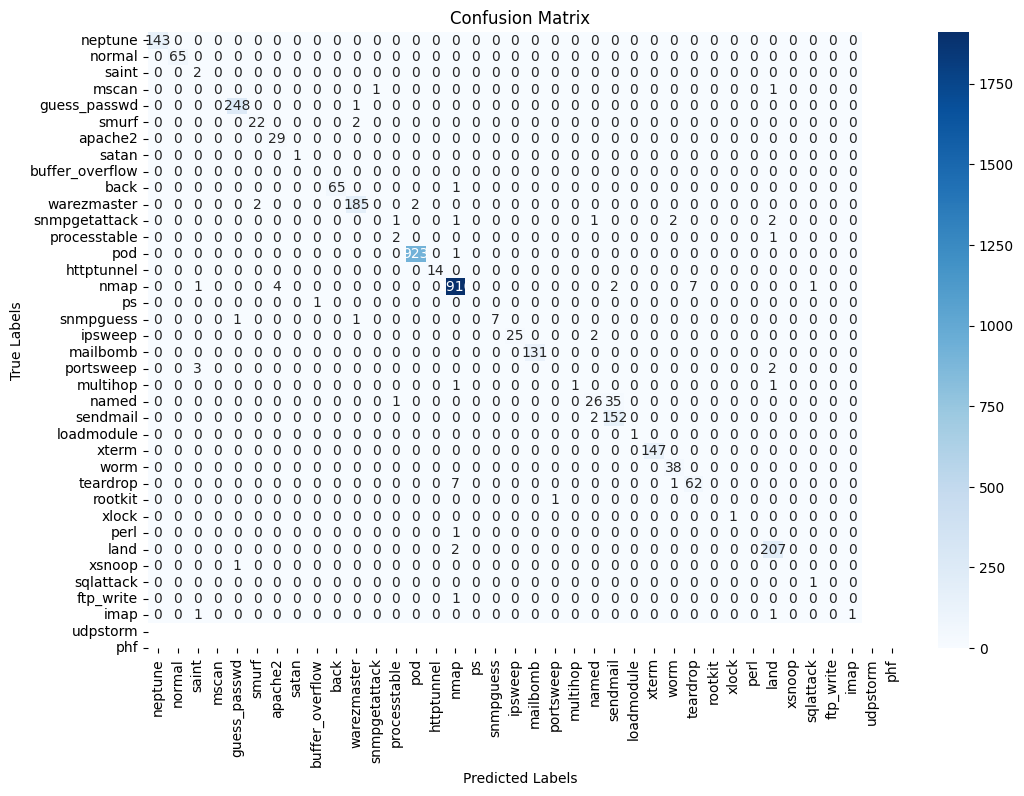

In [ ]:
# Define the class names (labels of the target variable)
class_names = data["attack_type"].unique()
# Since y_test is one-hot encoded, extract the true class labels
true_classes = y_test.argmax(axis=1)  # Convert one-hot encoded y_test to integer class labels

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'model.pkl')
print("Model saved successfully!")
model.save('model.h5')
print("Model saved successfully!")

Model saved successfully!
Model saved successfully!


In [ ]:
print("Unique classes in the original attack_type column:")
print(data['attack_type'].unique())


Unique classes in the original attack_type column:
['neptune' 'normal' 'saint' 'mscan' 'guess_passwd' 'smurf' 'apache2'
 'satan' 'buffer_overflow' 'back' 'warezmaster' 'snmpgetattack'
 'processtable' 'pod' 'httptunnel' 'nmap' 'ps' 'snmpguess' 'ipsweep'
 'mailbomb' 'portsweep' 'multihop' 'named' 'sendmail' 'loadmodule' 'xterm'
 'worm' 'teardrop' 'rootkit' 'xlock' 'perl' 'land' 'xsnoop' 'sqlattack'
 'ftp_write' 'imap' 'udpstorm' 'phf']


In [ ]:
# Assuming `history` is the training history returned by model.fit()
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined